In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd

### Review of lecture 15

In lecture 15 we learned:
   
    1) Some new plotting tricks with  histograms and cumulative distributions 
    
    2) About the topography of the Earth (hypsometric curve). 
    
    3) How to get lists of random numbers and reshape arrays from 2D to 1D.

### In this lecture we will:

1) Learn some basic statisics - samples versus populations and empirical versus theorectical distributions.

2) Learn to calculate _central tendencies_, _spreads_, and some characterization of the shape of the distribtion, e.g., _skewness_ and _kurtosis_, two statistics that are frequently used in sedimentology.  

3) Learn about _significant figures_ and more about formatting output. 

4) Learn some useful functions in NumPy and SciPy for simulating distributions and calculating statistics.

## Basic statistical concepts

Much of this lecture has been cribbed from the open source paper by Olea (2008) available in its entirety here:  https://pubs.usgs.gov/of/2008/1017/ofr2008-1017_rev.pdf which in turn was cribbed from Davis, J. (2002: Statistical and Data Analysis in Geology, 3rd Ed, Wiley, Hoboken).  

While this is not a class in statistics, many Earth Scientists write programs to calculate statistics, evaluate significance, and estimate _averages_ and their uncertainties.

So, what is statistics?  Statistics is the way we analyze, interpret and model data. To do it properly we need to understand a few concepts: 

1) **accuracy** versus **precision**:  accuracy is how close your data is to the "truth" while precision is the reproducibility of your data.  

2) **population** versus **sample**: the _population_ is the set of all possible outcomes of a given measurement (if you had an infinite number of data points), while the _sample_ is what you have - a finite number of data points.  

3) **probability**: Probability is the measure of how likely it is for a particular event to occur.  If something is impossible, it has a probability ($P$) of 0.  If it is a certainty, it has a probability $P$ of 1.  

4) **Theoretical** versus **empirical** distributions: Empirical distributions are measured data. Theoretical distributions are analytical  probabililty functions (mathematical equations) that can be described with an equation.  These can be applied to  data, allowing interpretations about the likelihood of observing a given measurement, whether  sets of data are "different" from theoretical or other empirical data sets and other powerful statistical tests.  

Now we will go through each of these concepts in a bit more detail. 

## 1) Accuracy versus precision

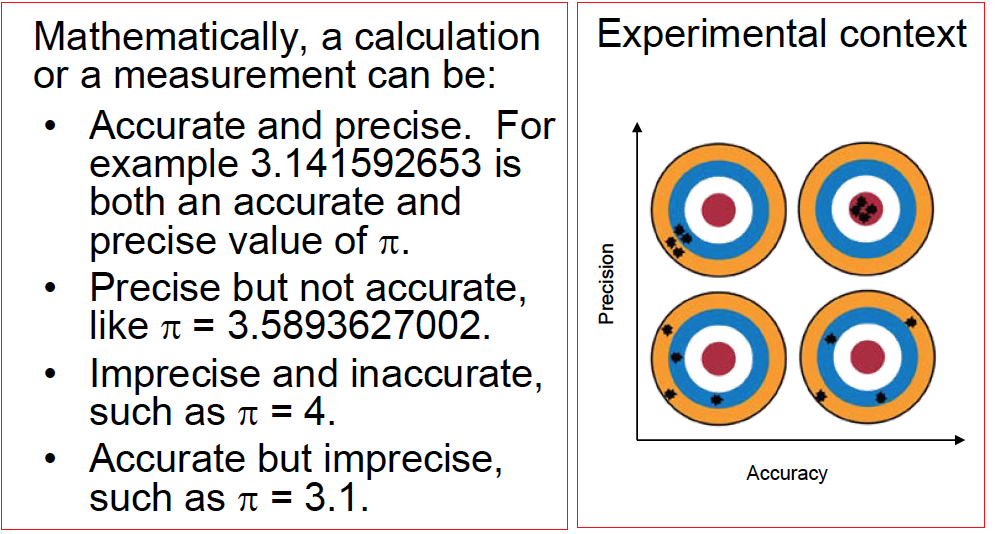

In [2]:
Image(filename='Figures/accuracy_precision.png',width=700)

[Figure from: https://pubs.usgs.gov/of/2008/1017/ofr2008-1017_rev.pdf.]


## 2) Populations versus samples

The population is what you would have if you had all possible outcomes - but you never do. We can describe the distribution of a population by using  equations which will predict, say, the fraction of measurements (the _density_) expected to fall within a given range ($x$ between 0 and 1), assuming a particular theoretical distribution.  This curve is called the _probability density function_.  

There are equations describing many different types of distributions and evaluating the equations gives us a theoretical distribution. In this lecture, we will look at a few common distributions (_binomial, uniform, normal,_ and  _log-normal_).   

Samples are finite collections of observations which may belong to a given distribution. In this lecture, it will be handy to   simulate 'measurements' by drawing 'observations' from a theoretical distribution, instead of making actual measurements.  This is the _Monte Carlo_ approach (after the gambling town).


Examples of theoretical versus empirical distributions:

### Binomial distribution:

#### Theoretical

Perhaps the most straight forward distribution is the _binomial_ distribution which describes the probability of a particular outcome when there are only two possibilities (yes or no, heads or tails, 1 or 0).   For example, in a coin toss experiment (heads or tails), if we flip the coin  $n$ times, what is the probability of getting $x$ 'heads'?  We assume that the probability $p$ of a head for any given coin toss is 50%; put another way $p$ = 0.5.  

The binomial distribution can be described by an equation: 

$$P=f(x,p,n)= \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}, x=0,1,2,...,n.$$

We can look at this kind of distribution by evaluating the probability for getting $x$ 'heads' out of $n$ attempts using our old friend - the _lambda_ function. We'll code the equation as a _lambda_ function, and calculate the probability $P$ of a particular outcome (e.g., $x$ heads in $n$ attempts).  We can collect all the answers in a list and  plot the probability ($P$) versus the number of heads ($x$) out of $n$ attempts.  

Here is a _lambda_ function **Binomial** which returns the probability of a given number of heads ($x$) out of $n$ attempts.  Note that for a coin toss, $p$ is 0.5, but other yes/no questions can be investigated as well (e.g., chance of winning the lottery given purchase of $n$ tickets). 

In [3]:
Binomial=lambda x,n,p :(np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x)))\
                   *(p**(x))*(1.-p)**(n-x)
    

We can use **Binomial** to look at the predicted likelihood of getting $x$ heads out of $n=12$ attempts (coin tosses) with a $p$ (probability) of 0.5. 

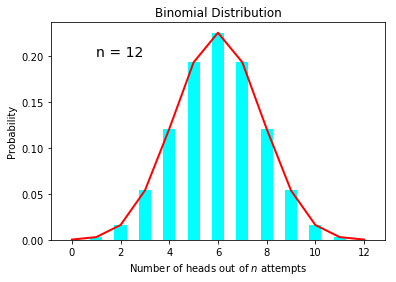

In [4]:
# calculate the probability  of x heads in n attempts with a probability of 0.5
n,p=12,0.5 # number of attempts in each trial, probability of getting a head
xs=range(n+1) # range of test values from 0,N
Probability=[] # probability of getting x heads out of n attempts
for x in xs: # step trough the test values
    Probability.append(Binomial(x,n,p))# collect the theoretical probability of getting x heads
plt.bar(xs,Probability,width=.5,color='cyan') # plot as bar plot
plt.plot(xs,Probability,'r-',linewidth=2) # plot as solid line
plt.xlabel('Number of heads out of $n$ attempts') # add labels
plt.ylabel('Probability') 
# place a note in upper left in axes coordinates with a fontsize of 14.
plt.text(1,.2, 'n = %i'%(n),  fontsize=14)
plt.title('Binomial Distribution');

_Red line is the theoretical probability distribution function.  Cyan bars are the same, but plotted as a bar graph._

I plotted the outcome as both a bar plot and a solid red line, to demonstrate two different ways of visualizing the results. Note that the red line is the _probability density function_.  

What you learn from this is that the most probable outcome is 6 out of 12 heads (with a $P$ of ~23%)   but other outcomes can very well occur.  


### Practice with Binomial functions

- Calculate the probability of getting a winning a lottery ticket. The probability of winning ($p$) is 1 in 20 and you have money to purchase up to 10 tickets- ($n$).  

- Plot the probability against tickets purchased as a green bar plot and label both axes.  

#### Empirical

One great feature about computers is that we can simulate data collection to compare to our theoretical predictions. 
We can use the module **numpy.random** to generate examples of  simulated data sets in a process called _Monte Carlo simulation_.  We encountered **numpy.random( )** in the last lecture when we used the **randint( )** function.  In this lecture we will discover a few more, starting with **random.binomial( )** which generates samples from a _binomial_ distribution. 

To use all the functions in **random** we must first import it.  

In [5]:
from numpy import random

To generate some  data, you could either patiently do the experiment with a coin toss, or we can just use the **random.binomial** function to simulate 'realistic' data.  

In [6]:
#help(random.binomial)

**random.binomial( )** requires 2 parameters, $n$ and $p$, with an optional keyword argument $size$ (if $size$ is not specified, it returns a single trial).   Each call to **random.binomial( )** returns the number of heads flipped in a single trial of $n$ coin tosses, given the probablity $p=0.5$. 

Let's try it with $n=12$ and $p=0.5$.  This little code block returns the number of heads out of $n$ attempts. You will get a different answer every time you run it.  It also gives the probabilty of getting that result from our lambda function **Binomial( )**. 

In [7]:
n,p=12,0.5 # same as before
x=random.binomial(n,p) # size = 1 by default
print (x, 'heads, with a likelihood of: ',Binomial(x,n,p))

7 heads, with a likelihood of:  0.193359375


 As the number of times you repeat this 'experiment' approaches infinity, the distribution of outcomes will approach the theoretical distribution (i.e., you will get an average of 9 heads out of 12 attempts 5% of the time).   

So let's compare the results simulated from (Monte Carlo) for some number of experiments ($Nmc$) with the theoretical distribution.  To do this,  we pretend that each student in the class ($Nmc=30$) flips a coin $n=12$ times and reports the number of heads.  We can collect the number of heads flipped by each student in a list called **Simulated**.

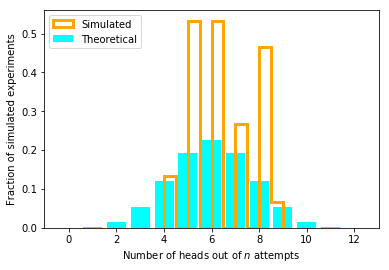

In [8]:
n,p=12,0.5
Nmc=30 # number of simulated experiments each with n  attempts
Simulated=random.binomial(n,p,size=Nmc)
plt.bar(xs,Probability,color='cyan', label='Theoretical') # theoretical curve as bar graph
plt.hist(Simulated,normed=True,color='orange',histtype='step',linewidth=3, label='Simulated') # note the normed key word - 
    #  this normalizes the total to be unity
plt.xlabel('Number of heads out of $n$ attempts')
plt.ylabel('Fraction of simulated experiments')
plt.legend();

_Orange line is the Monte Carlo results.  Blue line is the theoretical probability distribution function from before._

Notice that every time you repeat this, the Monte Carlo results are a little different.  And if you change $Nmc$ to be, say 10, you get more and more "weird" results.  But if you set $Nmc$ to 5000 - your results would look consistently  closer to the theoretical predictions. 

Also, something about the 'normed' keyword in **plt.hist( )**.  According to the **NumPy** documention for  **normed**: If it is set to 'True', the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. The sum of the histogram values will not  equal  1 unless bins of unity width are used.

### Practice with Monte Carlo simulation with random.binomial( )

- Redo the above simulation using Nmc of 100 and 5000. 
- Plot the Simulated versus the theoretical distributions as histograms and lines respectively.  

### Other distributions

There are many other distributions that we could play with. In the rest of the lecture, we will look at a few more:   uniform,  normal and  log normal distributions.   We'll approach each in the same way as for the binomial distributions starting with the theoretical distribution followed by a Monte Carlo simulation of empirical results.  

### Uniform distribution

#### Theoretical

A uniform distribution is pretty much what it sounds like.  All outcomes within the bounds of $a,b$ are equally likely. Outside those bounds, the probability is zero.   For example, when playing dice, what is the likelihood of getting a particular number of dots (1 in 6).

The analytical form for a uniform distribution is:

$$P=f(x,a,b)= \frac{1}{b-a},  x=a \rightarrow b$$

where $a$ and $b$ are bounds ($a<x<b$). $P$ is the probability of getting a value of $x$.  It is zero if $x$ is not between $a$ and $b$, and  between $a$ and $b$ the probability is a constant. In fact the probability is  $1/n$ where $n$ is  $b-a$, the number of possible outcomes.

Say we have a die with 1 to 6 dots on each face.  The probability of getting one dot is 1 in 6, but getting seven dots is zero.  

We code up the _lambda_ function as before:


In [9]:
Uniform=lambda a,b : (1./(b-a)) # function for calculated P from a uniform distribution.  

And calculate the probability density function as before:

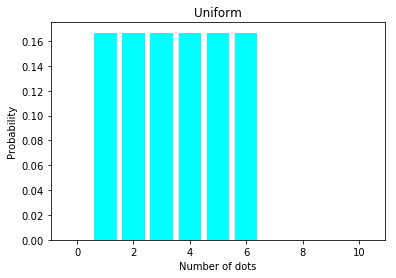

In [10]:

# calculate the probability of returning a value x with a uniform distribution between a,b
xs=range(11) # range of possible number of dots from 1 to 10. 
a,b=1,7 # bounds for the uniform distribution
Probability=[] # container for the theoretical results. 
for x in xs: # step through test values
    if x not in range(a,b): # if x<a or x>b,  there is zero probability of rolling this number
        Probability.append(0) # save the probability
    else: # otherwise
        Probability.append(Uniform(a,b)) # get the probability from our little function
plt.bar(xs,Probability,color='cyan') # plot as a bar plot
plt.title('Uniform')
plt.xlabel('Number of dots')
plt.ylabel('Probability');


#### Empirical

And now the Monte Carlo simulation of an empirical distribution using **random.uniform( )**. 

So here it is.    

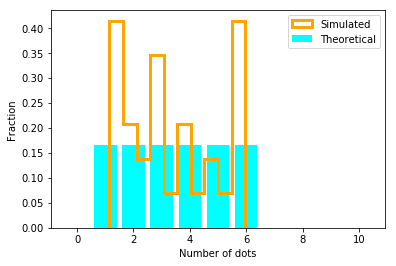

In [11]:
a,b=1,6 # keep same bounds
Nmc=30 # number of "students" rolling the dice
Simulated=random.uniform(a,b,30) # get Nmc test values in one go.  :)
plt.bar(xs,Probability, color='cyan',label='Theoretical')
# plot results as histogram normed to sum to unity and use histtype of 'step' to make it see-through
plt.hist(Simulated,normed=True,histtype='step',color='orange',linewidth=3.,label='Simulated') 
plt.xlabel('Number of dots')
plt.ylabel('Fraction')
plt.legend();

### Practice with uniform distributions

- Calculate the theoretical distribution of getting a particular azimuth between 0 and 360, if each result is equally likely (a uniform distribution between 0 and 360).
- Perform a  Monte Carlo simulation with $n=30$ trials. 
- Plot your theoretical and simulated results as a bar and histogram plot respectively.   

There are two, more closely related distributions which we need to discuss:  the normal and the log-normal distributions.  We'll do these with the same approach as before, looking first at the theoretical probability function and then as a Monte Carlo simulation.  

### Normal distributions

The so-called "normal" distribution (also known as a Gaussian distribution after the guy who thought it up) describes data like measurement data that have uncertainty associated with them (they are more or less precise).  There is some 'true' answer but all the measurements have some error. Imagine measuring the width of a sedimentary bed, or the length of a fossil thigh bone or the distance between two points.  The measurement data will have some _average_ (a.k.a. _central tendency_) and some degree of _spread_.  For normal distributions,  the average is the arithmetic _mean_ $\mu$ and the spread is the _standard deviation_, $\sigma$.  

#### Theoretical: 

The analytical form for a normal distribution is:

$$P=f(x,\mu, \sigma)= \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},-\infty < x < \infty$$


We can put this equation into a lambda function called **Normal** and work on it as before with one small modification.  We can write the Normal _lambda_ function such that it returns an array if $x$ is passed as an array. 
 

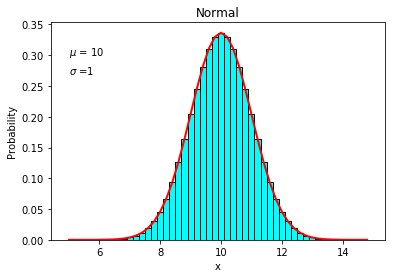

In [12]:
Normal=lambda x,mu,sigma : (1./(sigma*np.sqrt(2.**np.pi)))*np.e**(-(x-mu)**2/(2.*sigma**2))

# calculate the probability of observing a measurement value of x from a normal distribution with mu and sigma

mu,sigma,incr=10,1,.2 # set the mean,  standard deviation and bin width
xs=np.arange(5,15,incr) # make an array of test values
Probability=Normal(xs,mu,sigma) # get probabilities 
plt.bar(xs,Probability,width=incr,color='cyan', edgecolor='k') # make the bar chart
plt.plot(xs,Probability,'r-',linewidth=2) # plot as a continuous probability distribution
plt.xlabel('x')
plt.ylabel('Probability')
plt.text(5,.3,'$\mu$ = '+str(mu)) # stick on some notes
plt.text(5,.27,'$\sigma$ ='+str(sigma))
plt.title('Normal');


That should look a lot like the so-called 'bell curve' - the curve used for grading for example - because that is exactly what it is.  

#### Empirical

So let's compare the bell curve with some simulated data.  For this, we can use  **random.normal( )**.

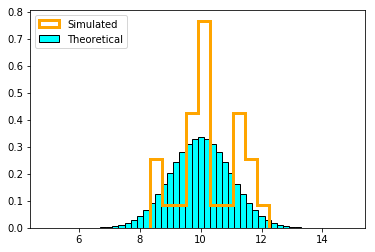

In [13]:
mu,sigma=10,1 # set the mean,  standard deviation
Nmc=30 # number of monte carlo simultions
Simulated=random.normal(mu,sigma,Nmc) # get Nmc  simulated data points from distribution
plt.bar(xs,Probability,width=incr, edgecolor='k',label='Theoretical',color='cyan') # make the bar chart
plt.hist(Simulated,normed=True,histtype='step',color='orange',linewidth=3.,label='Simulated') # plot them
plt.legend();

We talked about the mean and standard deviation of a theoretical distribution.  Now we learn how to calculate them for our simulated sample.  Note that for the population (as defined above), the average is $\mu$ but for our _sample_, it is $\bar x$:

$$ \bar{x} = \frac{\sum x_i}{N},$$

where $\sum_{i=1}^N$ means the sum of all individual values of $x$ from the first to the last.

Similarly, the standard deviation of the population is $\sigma$, while for our sample, it is $s$:  

$$s = \sqrt {\frac {1}{N}\sum_{i=1}^{N}(x_i-\bar x)^2 }$$

   Note that the _variance_ of the data is $s^2$ (and for the population it is $\sigma^2$).  

With **NumPy**, we can calculate the mean and standard deviation with the methods **mean( )** and **std( )** like this:

In [15]:
print ('Mean of the simulated distribution = ',Simulated.mean()) 
print ('standard deviation of simulated distribution =',Simulated.std()) 

Mean of the simulated distribution =  10.2544210338
standard deviation of simulated distribution = 0.976820070452


Now we need to discuss formating and significant figures.  For our purposes, only the first few of these trailing decimals are significant, so we should format our print string accordingly.  These are floating point variables and say we want a total of up to, say, 6 characters with two after the decimal point.  We would write this with a string formatting statement with the form '%XXX.XXf'   %(variable).  

In [16]:
print ('Mean of the simulated distribution = %6.2f'%(Simulated.mean() ))
print ('standard deviation of simulated distribution =','%6.2f'%(Simulated.std() ))

Mean of the simulated distribution =  10.25
standard deviation of simulated distribution =   0.98





Let's plot the mean and $s$ onto our histogram:  


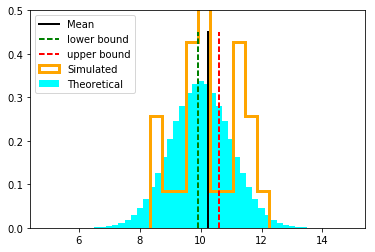

In [17]:
plt.bar(xs,Probability,width=incr,color='cyan',label='Theoretical') # make the bar chart
stderr=Simulated.std()/np.sqrt(len(Simulated))
plt.hist(Simulated,normed=True,histtype='step',color='orange',linewidth=3.,label='Simulated') # plot them
plt.plot([Simulated.mean(),Simulated.mean()],[0,.45],'k-',linewidth=2,label='Mean')
plt.plot([Simulated.mean()-1.97*stderr,Simulated.mean()-1.97*stderr],[0,.45],
         'g--',linewidth=2,label='lower bound')
plt.plot([Simulated.mean()+1.97*stderr,Simulated.mean()+1.97*stderr],[0,.45],
         'r--',linewidth=2,label='upper bound')
plt.ylim(0,.5)
plt.legend();




Notice two things: 

1) the standard deviation includes ~67% of the data (not 95%), that would be 1.97$\sigma$ (or 2-sigma, informally).  The $\pm \sigma$ bounds are the dashed lines in the above plot.  

2) the mean of our sample is generally not the same as the mean of the distribution ($\bar x \ne \mu$).  In fact, the 95% confidence bounds for the MEAN is related to the 'standard error', which is:

$s_e = \frac {s}{\sqrt N}$.


The 95% confidence bounds for the mean is given by 1.97$s_e$.  This means in practice that the mean will be more than 1.97$s_e$ away from true mean 5% of the time.    We could test that statement with another little Monte Carlo type simulation, but I leave that to student curiosity.   




### Practice with normal distributions
- Calculate the theoretical distribution for grades with a mean of 50% and a standard deviation of $\pm$ 20.
- Simulate the results of an exam taken by 35 students
- Calculate the mean and standard deviation of your simulated results. 
- Put on a solid line representing the cutoffs for As, Bs, Cs, Ds, and Fs in your 'class'.  